# K-Means Algorithm with scikit-learn
## The case of Random sampling

In this notebook, we show the use of *scikit-learn* library <span style="font-family:Courier New">KMeans</span>. More specifically, we perform a k-means clustering algorythm [[**1**]](https://en.wikipedia.org/wiki/K-means_clustering) over a dataset of points generated at random. 

First thing first, let's import all the libraries we need for this project.

In [74]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
import random
import matplotlib.pyplot as plt

Then, we generate the random dataset using the *scikit-learn* function <span style="font-family:Courier New">make_blobs()</span>, useful to generate synthetic clusters.

In [81]:
features, true_labels = make_blobs(
    n_samples=300,
    centers=6,
    cluster_std=3.75,
    random_state=None
)

We do some re-scale preprocessing on the data, with <span style="font-family:Courier New">StandardScaler()</span>. 

In [82]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

We can decide either to set a specific number of clusters a propri, or obtain it using the elbow method.

In [83]:
## We run max_iter k-means, incrementing k with each iteration.
## We record the SSE for each iteration.

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": None,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

## We are able to find the elbow in the "SSE vs number of clusters" curve  
## thanks to KneeLocator().
    
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

## We collect the value of the elbow, kl, in a new variable num_clusters

num_clusters=kl.elbow

Now we are ready for <span style="font-family:Courier New">KMeans()</span>.

In [84]:
kmeans = KMeans(
    init="random",
    n_clusters=num_clusters,
    n_init=10,
    max_iter=300,
    random_state=None
)

kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3)

In order to plot the data, first we randomly generate the colours assigned to each of the k-means clusters.

In [85]:
## We generate a set of random hex colours with the same number 
## of elements as the number of kmeans labels. 

hex_colours=set()
count=len(set(kmeans.labels_))

while count>0:
    random_number = random.randint(0,16777215)
    hex_number = str(hex(random_number))
    hex_number ='#'+ hex_number[2:]
    if hex_number not in hex_colors:
        hex_colours.add(hex_number)
        count=count-1

## Then we create a dictionary with kmeans labels as keys,  
## and hex colours as values.
    
fte_colours = {}

for i in range (0, len(set(kmeans.labels_))):
                fte_colours[i]=list(hex_colours)[i]

Then, we are able to plot the k-means clustering for the specified number of clusters.

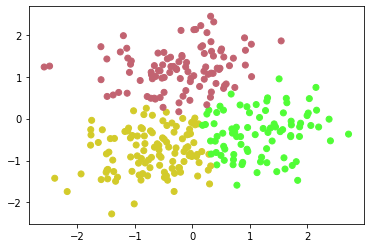

In [86]:
km_colours = [fte_colours[label] for label in kmeans.labels_]
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colours)

plt.show()